<a href="https://colab.research.google.com/github/Murielbs/Analise_enem_2020/blob/main/Analise_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import numpy as np


In [65]:
df = pd.read_csv("MICRODADOS_ENEM_2020.csv", sep=";", encoding="latin1")
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B


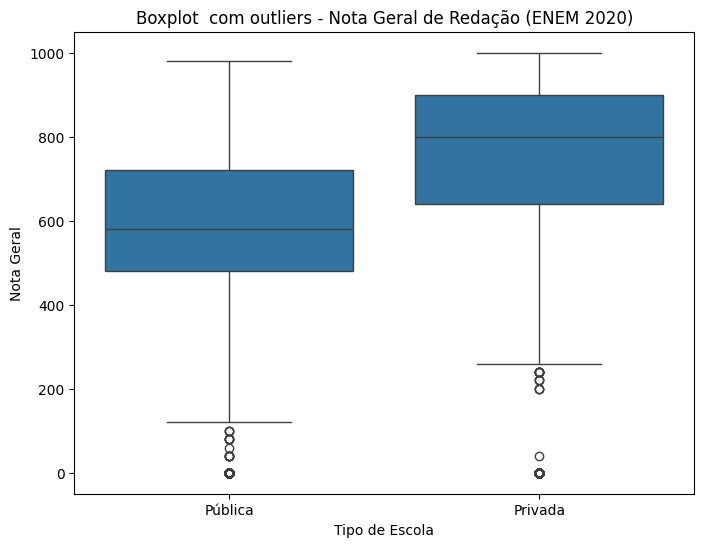

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[df["TP_ESCOLA"].isin([2,3])], x="TP_ESCOLA", y="NU_NOTA_REDACAO" )
plt.title("Boxplot  com outliers - Nota Geral de Redação (ENEM 2020)")
plt.xlabel("Tipo de Escola")
plt.ylabel("Nota Geral")
plt.xticks(ticks=[0,1], labels=["Pública", "Privada"])
plt.show()


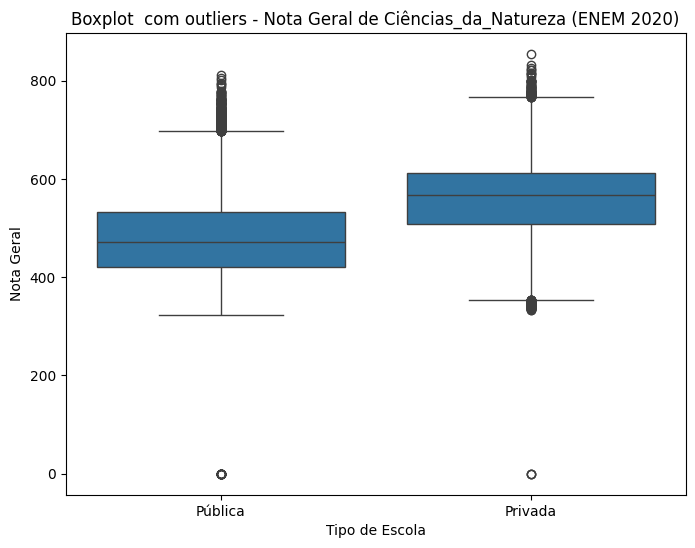

In [46]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[df["TP_ESCOLA"].isin([2,3])], x="TP_ESCOLA", y="NU_NOTA_CN" )
plt.title("Boxplot  com outliers - Nota Geral de Ciências_da_Natureza (ENEM 2020)")
plt.xlabel("Tipo de Escola")
plt.ylabel("Nota Geral")
plt.xticks(ticks=[0,1], labels=["Pública", "Privada"])
plt.show()


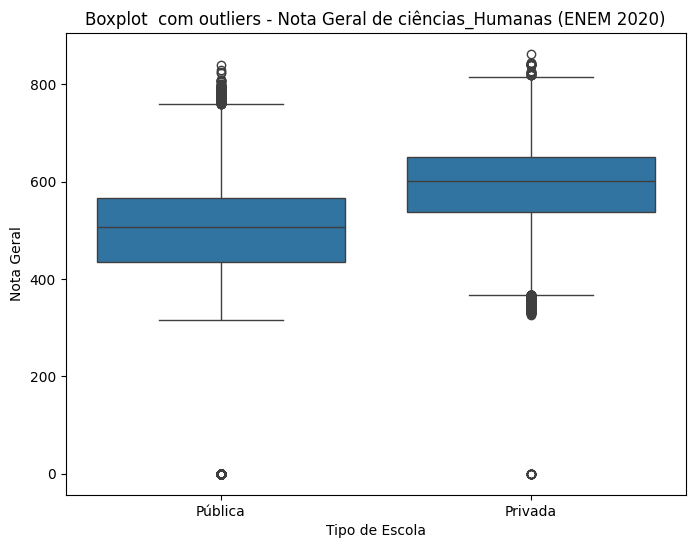

In [47]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[df["TP_ESCOLA"].isin([2,3])], x="TP_ESCOLA", y="NU_NOTA_CH" )
plt.title("Boxplot  com outliers - Nota Geral de ciências_Humanas (ENEM 2020)")
plt.xlabel("Tipo de Escola")
plt.ylabel("Nota Geral")
plt.xticks(ticks=[0,1], labels=["Pública", "Privada"])
plt.show()


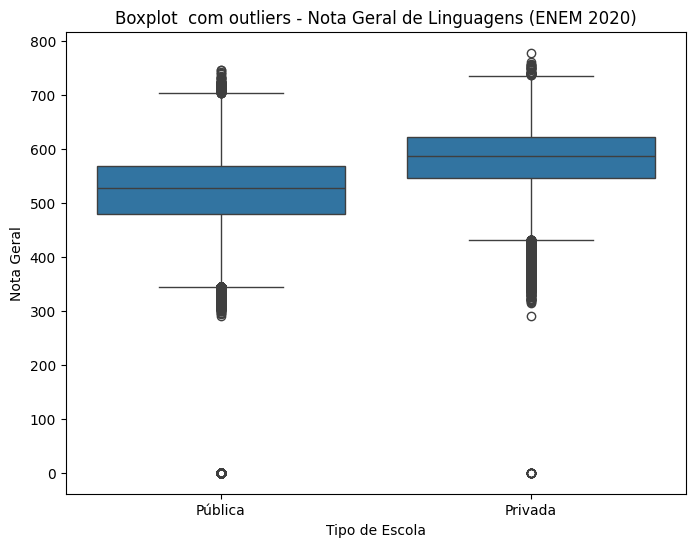

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[df["TP_ESCOLA"].isin([2,3])], x="TP_ESCOLA", y="NU_NOTA_LC" )
plt.title("Boxplot  com outliers - Nota Geral de Linguagens (ENEM 2020)")
plt.xlabel("Tipo de Escola")
plt.ylabel("Nota Geral")
plt.xticks(ticks=[0,1], labels=["Pública", "Privada"])
plt.show()


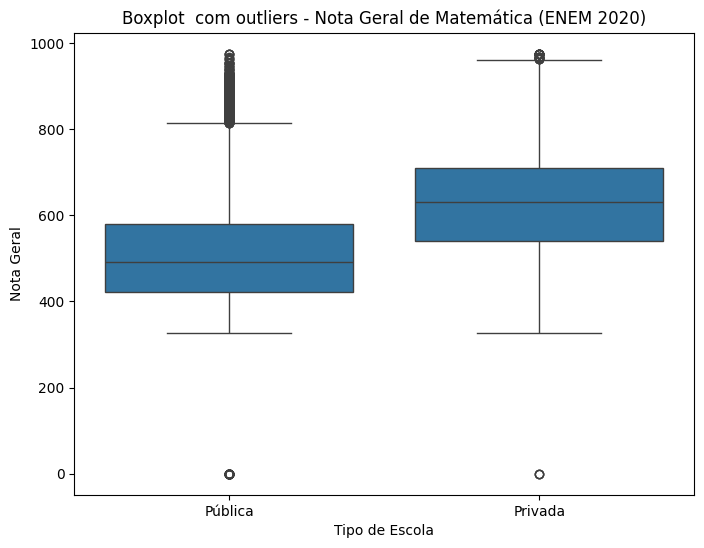

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[df["TP_ESCOLA"].isin([2,3])], x="TP_ESCOLA", y="NU_NOTA_MT" )
plt.title("Boxplot  com outliers - Nota Geral de Matemática (ENEM 2020)")
plt.xlabel("Tipo de Escola")
plt.ylabel("Nota Geral")
plt.xticks(ticks=[0,1], labels=["Pública", "Privada"])
plt.show()


In [66]:
# Filtrar apenas escolas públicas (2) e privadas (3)
df_filtrado = df[df["TP_ESCOLA"].isin([2,3])]

# notas de Redação
notas_publica_REDAÇÃO = df_filtrado[df_filtrado["TP_ESCOLA"] == 2]["NU_NOTA_REDACAO"].dropna()
notas_privada_REDAÇÃO  = df_filtrado[df_filtrado["TP_ESCOLA"] == 3]["NU_NOTA_REDACAO"].dropna()

#notas de Ciências da natureza NU_NOTA_CN
notas_publica_NATUREZA = df_filtrado[df_filtrado["TP_ESCOLA"] == 2]["NU_NOTA_CN"].dropna()
notas_privada_NATUREZA = df_filtrado[df_filtrado["TP_ESCOLA"] == 3]["NU_NOTA_CN"].dropna()

# notas de ciências humanas NU_NOTA_CH

notas_publica_HUMANAS = df_filtrado[df_filtrado["TP_ESCOLA"] == 2]["NU_NOTA_CH"].dropna()
notas_privada_HUMANAS = df_filtrado[df_filtrado["TP_ESCOLA"] == 3]["NU_NOTA_CH"].dropna()

# notas de linguagens  NU_NOTA_LC

notas_publica_LINGUAGENS = df_filtrado[df_filtrado["TP_ESCOLA"] == 2]["NU_NOTA_LC"].dropna()
notas_privada_LINGUAGENS = df_filtrado[df_filtrado["TP_ESCOLA"] == 3]["NU_NOTA_LC"].dropna()

# notas de matemática NU_NOTA_MT

notas_publica_MATEMATICA = df_filtrado[df_filtrado["TP_ESCOLA"] == 2]["NU_NOTA_MT"].dropna()
notas_privada_MATEMATICA = df_filtrado[df_filtrado["TP_ESCOLA"] == 3]["NU_NOTA_MT"].dropna()

In [67]:
# Redação

print("Média pública de Redação:", notas_publica_REDAÇÃO.mean())
print("Média privada de Redação:", notas_privada_REDAÇÃO.mean())
print("Desvio padrão pública de Redação:", notas_publica_REDAÇÃO.std())
print("Desvio padrão privada de Redação:", notas_privada_REDAÇÃO.std())
print("n pública de Redação:", len(notas_publica_REDAÇÃO))
print("n privada de Redação:", len(notas_privada_REDAÇÃO))
print()

# Ciências da Natureza

print("Média pública de Ciências da Natureza:", notas_publica_NATUREZA.mean())
print("Média privada de Ciências da Natureza:", notas_privada_NATUREZA.mean())
print("Desvio padrão pública de Ciências da Natureza:", notas_publica_NATUREZA.std())
print("Desvio padrão privada de Ciências da Natureza:", notas_privada_NATUREZA.std())
print("n pública de Ciências da Natureza:", len(notas_publica_NATUREZA))
print("n privada de Ciências da Natureza:", len(notas_privada_NATUREZA))
print()

# Ciências Humanas

print("Média pública de Ciências Humanas:", notas_publica_HUMANAS.mean())
print("Média privada de Ciências Humanas:", notas_privada_HUMANAS.mean())
print("Desvio padrão pública de Ciências Humanas:", notas_publica_HUMANAS.std())
print("Desvio padrão privada de Ciências Humanas:", notas_privada_HUMANAS.std())
print("n pública de Ciências Humanas:", len(notas_publica_HUMANAS))
print("n privada de Ciências Humanas:", len(notas_privada_HUMANAS))
print()

# Linguagens

print("Média pública de Linguagens:", notas_publica_LINGUAGENS.mean())
print("Média privada de Linguagens:", notas_privada_LINGUAGENS.mean())
print("Desvio padrão pública de Linguagens:", notas_publica_LINGUAGENS.std())
print("Desvio padrão privada de Linguagens:", notas_privada_LINGUAGENS.std())
print("n pública de Linguagens:", len(notas_publica_LINGUAGENS))
print("n privada de Linguagens:", len(notas_privada_LINGUAGENS))
print()

# Matemática

print("Média pública de Matemática:", notas_publica_MATEMATICA.mean())
print("Média privada de Matemática:", notas_privada_MATEMATICA.mean())
print("Desvio padrão pública de Matemática:", notas_publica_MATEMATICA.std())
print("Desvio padrão privada de Matemática:", notas_privada_MATEMATICA.std())
print("n pública de Matemática:", len(notas_publica_MATEMATICA))
print("n privada de Matemática:", len(notas_privada_MATEMATICA))

Média pública de Redação: 657.5429463820926
Média privada de Redação: 774.6666666666666
Desvio padrão pública de Redação: 192.21028348275908
Desvio padrão privada de Redação: 176.86024997889962
n pública de Redação: 1921
n privada de Redação: 60

Média pública de Ciências da Natureza: 499.62881813275766
Média privada de Ciências da Natureza: 555.7423728813559
Desvio padrão pública de Ciências da Natureza: 75.8801896119552
Desvio padrão privada de Ciências da Natureza: 88.81149002122191
n pública de Ciências da Natureza: 1853
n privada de Ciências da Natureza: 59

Média pública de Ciências Humanas: 532.0558563248309
Média privada de Ciências Humanas: 585.7966666666666
Desvio padrão pública de Ciências Humanas: 87.24003822254444
Desvio padrão privada de Ciências Humanas: 86.3649233699687
n pública de Ciências Humanas: 1921
n privada de Ciências Humanas: 60

Média pública de Linguagens: 539.0326913066111
Média privada de Linguagens: 580.7583333333334
Desvio padrão pública de Linguagens: 6

In [68]:
# Redação
n_publica = len(notas_publica_REDAÇÃO)
n_privada = len(notas_privada_REDAÇÃO)
print("Shapiro-Wilk - Redação:")
print("Pública:", stats.shapiro(notas_publica_REDAÇÃO.sample(min(5000, n_publica), random_state=42)))
print("Privada:", stats.shapiro(notas_privada_REDAÇÃO.sample(min(5000, n_privada), random_state=42)))
print()

# Ciências da Natureza
n_publica = len(notas_publica_NATUREZA)
n_privada = len(notas_privada_NATUREZA)
print("Shapiro-Wilk - Ciências da Natureza:")
print("Pública:", stats.shapiro(notas_publica_NATUREZA.sample(min(5000, n_publica), random_state=42)))
print("Privada:", stats.shapiro(notas_privada_NATUREZA.sample(min(5000, n_privada), random_state=42)))
print()

# Ciências Humanas
n_publica = len(notas_publica_HUMANAS)
n_privada = len(notas_privada_HUMANAS)
print("Shapiro-Wilk - Ciências Humanas:")
print("Pública:", stats.shapiro(notas_publica_HUMANAS.sample(min(5000, n_publica), random_state=42)))
print("Privada:", stats.shapiro(notas_privada_HUMANAS.sample(min(5000, n_privada), random_state=42)))
print()

# Linguagens
n_publica = len(notas_publica_LINGUAGENS)
n_privada = len(notas_privada_LINGUAGENS)
print("Shapiro-Wilk - Linguagens:")
print("Pública:", stats.shapiro(notas_publica_LINGUAGENS.sample(min(5000, n_publica), random_state=42)))
print("Privada:", stats.shapiro(notas_privada_LINGUAGENS.sample(min(5000, n_privada), random_state=42)))
print()

# Matemática
n_publica = len(notas_publica_MATEMATICA)
n_privada = len(notas_privada_MATEMATICA)
print("Shapiro-Wilk - Matemática:")
print("Pública:", stats.shapiro(notas_publica_MATEMATICA.sample(min(5000, n_publica), random_state=42)))
print("Privada:", stats.shapiro(notas_privada_MATEMATICA.sample(min(5000, n_privada), random_state=42)))
print()


Shapiro-Wilk - Redação:
Pública: ShapiroResult(statistic=np.float64(0.9637592025662498), pvalue=np.float64(1.5509488912126449e-21))
Privada: ShapiroResult(statistic=np.float64(0.870311080301909), pvalue=np.float64(1.2794301700198552e-05))

Shapiro-Wilk - Ciências da Natureza:
Pública: ShapiroResult(statistic=np.float64(0.9882652896306475), pvalue=np.float64(3.934934578049975e-11))
Privada: ShapiroResult(statistic=np.float64(0.9752695736249888), pvalue=np.float64(0.27155145875913567))

Shapiro-Wilk - Ciências Humanas:
Pública: ShapiroResult(statistic=np.float64(0.9878822773883292), pvalue=np.float64(1.2225528507837224e-11))
Privada: ShapiroResult(statistic=np.float64(0.9849853698138318), pvalue=np.float64(0.6692649377895787))

Shapiro-Wilk - Linguagens:
Pública: ShapiroResult(statistic=np.float64(0.9807827021948914), pvalue=np.float64(2.1148799993292846e-15))
Privada: ShapiroResult(statistic=np.float64(0.9928070027144902), pvalue=np.float64(0.9785215310527983))

Shapiro-Wilk - Matemátic

p<0.05, então nenhuma das duas variáveis tem distribuição normal, prosseguimos para o teste não-paramétrico de Mann-Whitney:

In [69]:
mean_diff = notas_privada_REDAÇÃO.mean() - notas_publica_REDAÇÃO.mean()
statistic, p = stats.mannwhitneyu(notas_privada_REDAÇÃO, notas_publica_REDAÇÃO, alternative="greater")
print(f"Resultados teste Mann-Whitney U: stats={statistic}, p={p}")

mean_diff = notas_privada_NATUREZA.mean() - notas_publica_NATUREZA.mean()
statistic, p = stats.mannwhitneyu(notas_privada_NATUREZA, notas_publica_NATUREZA, alternative="greater")
print(f"Resultados teste Mann-Whitney U: stats={statistic}, p={p}")

mean_diff = notas_privada_HUMANAS.mean() - notas_publica_HUMANAS.mean()
statistic, p = stats.mannwhitneyu(notas_privada_HUMANAS, notas_publica_HUMANAS, alternative="greater")
print(f"Resultados teste Mann-Whitney U: stats={statistic}, p={p}")

mean_diff = notas_privada_LINGUAGENS.mean() - notas_publica_LINGUAGENS.mean()
statistic, p = stats.mannwhitneyu(notas_privada_LINGUAGENS, notas_publica_LINGUAGENS, alternative="greater")
print(f"Resultados teste Mann-Whitney U: stats={statistic}, p={p}")

mean_diff = notas_privada_MATEMATICA.mean() - notas_publica_MATEMATICA.mean()
statistic, p = stats.mannwhitneyu(notas_privada_MATEMATICA, notas_publica_MATEMATICA, alternative="greater")
print(f"Resultados teste Mann-Whitney U: stats={statistic}, p={p}")




Resultados teste Mann-Whitney U: stats=78726.0, p=6.561174797188553e-07
Resultados teste Mann-Whitney U: stats=75410.0, p=3.358021510213972e-07
Resultados teste Mann-Whitney U: stats=77565.5, p=2.450933685143523e-06
Resultados teste Mann-Whitney U: stats=78181.5, p=1.237808906572382e-06
Resultados teste Mann-Whitney U: stats=74153.5, p=1.5176015678012065e-06
